# Gaussian Mixture Model

<from scikit-learn.org>
-  Probabilistic model that assumes all the data points are generated from a mixture of 
a finite number of Gaussian distributions with unknown parameters
-  Generalizing k-means clustering incorporate covariance structure of the data as well as the centers

- "Gaussian = Normal"
- GMM = 정확한 possibility를 제공 (어떤 데이터가 어느 곳에 속할지에 대한 확률을 제공)
- too restrictive

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

### data generation

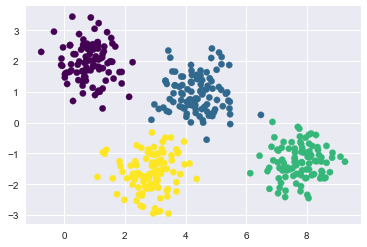

In [32]:
# Generate some data
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting(?)

plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [1]:
y_true

NameError: name 'y_true' is not defined

### K-Means Clustering: not assigning clustering-assigning probability

### Pandas 공부하기 Numpy 공부하기
- pivot_table
- df.groupby()
### seaborn plotly

In [33]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
# fit = 다양한 특징을 가진 datasets에서 공통된 특징(class)을 찾아서 .(dot)사용
## fit(X)  ???

labels = gmm.predict(X)
## predict(X)  ???

## Gaussian distribution의 unknown parameter = mean & variance 
## KMeans kustering의 unknown parameter = mean

In [34]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.    0.469 0.    0.531]
 [0.    0.    1.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    1.    0.   ]]


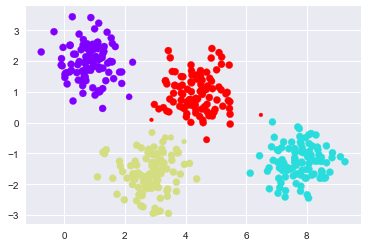

In [44]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', s=size);

# 동그라미의 크기가 클 수록 해당 그룹에 속해있을 확률이 큼

In [156]:
tmp = probs**2
npw =probs[np.where(tmp.sum(1) <= 0.6)]
print(npw)

[[1.75162717e-22 4.69238090e-01 2.76240973e-07 5.30761633e-01]
 [4.13152287e-10 9.54190714e-09 6.80457005e-01 3.19542985e-01]
 [3.80339560e-04 2.87688722e-15 4.63399146e-01 5.36220515e-01]]


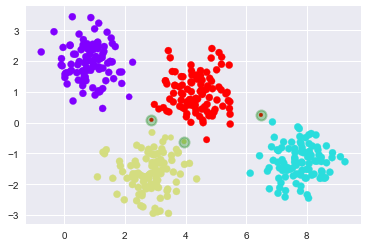

In [72]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', s=size)
for i in npw:
    plt.plot(X[i, 0], X[i, 1], 'o', color='green', markeredgewidth=2, markersize=10, alpha=0.3)

***Question: What's the probability of 'ball-like points' to be in purple zone or yellow zone?***
-  Seems to overlap between middle clusters 
-  k-means model has no intrinsic measure of probability or uncertainty of cluster assignments 

### K-Means Clustering:  appropriate for circular clustering

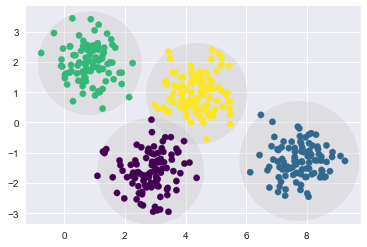

In [303]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting(?)

kmeans = KMeans(4, random_state=0)
kmeans.fit(X)
labels = kmeans.fit_predict(X)

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
ax.axis('equal');

centers = kmeans.cluster_centers_
radii = [cdist(X[labels==i], [centers[i]]).max()  for i in range(4)]
  
for c, r in zip(centers, radii):
    ax.add_patch(plt.Circle(c, r, alpha=0.3, fc='silver', lw=3))

[MatplotLib for Adding Patch](https://matplotlib.org/api/patches_api.html)

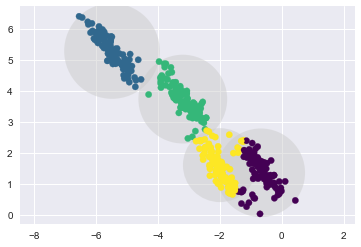

In [306]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# generating data
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting(?)

# create instance and fitting
kmeans = KMeans(4, random_state=0)
kmeans.fit(X)
labels = kmeans.fit_predict(X)

# data pertubation
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

# new fitting
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans_with_circle(kmeans, X_stretched)

- Transformed data are not circular 
- Hence K-mean has two shortcomings:
    -  lack of flexibility in cluster shape 
    -  lack of probabilistic cluster assignment
    
- 동그란 데이터뿐만 아니라 길쭉한 데이터도 가능 (Kmeans랑 다르다)

- covariance variable(???)
- 공분산: 같이 평균에서 벗어나는 정도
- $[(X-Xbar)(Y-Ybar)]$
- diag term : 자기분산
- non diag term : 공분산

###  Gaussian Mixture Model: 

***Gaussian Mixture Model***
-  Gaussain Mixture model is based on weighted sum of $M$ component's Gaussian density
\begin{align*}
p(\mathbf{x}|~\lambda) = \sum_{i=1}^{M} \omega_i g(\mathbf{x}~&|~\mu_i, \Sigma_i) \\
        where &\sum \omega_i =1,~~ \mathbf{x}:~~ feature~~ matrix,~~  g(\mathbf{x}~|~\mu_i, \Sigma_i):~ Gaussian~~ density \\
&   g(\mathbf{x}~|~\mu_i, \Sigma_i)=\frac{1}{(2\pi)^{1/2} |\Sigma_i|^{1/2}}
                 exp\{\frac{1}{2} (\mathbf{x}-\mu_i)'\Sigma_i^{-1}(\mathbf{x}-\mu_i)\}
\end{align*}

-  Hence the parameter to be estimated are:
\begin{equation*}
\lambda = (\omega_i, \mu_i , \Sigma_i)
\end{equation*}

***Gaussian Mixture: Covariance Issues***

- type: Spherical, Diagonal, full 
\begin{align*}
    &\Sigma(Spherical) = \sigma^2 I \\
    &\Sigma(Diagonal) = \mathbf{\mathit{diag}}(\sigma_1^2, \sigma_2^2, \cdots, \sigma_D^2)\\
    &\Sigma(full) = 
     \begin{bmatrix} \sigma^2_1&\sigma_{12}&\sigma_{13}&\cdots&\sigma_{1D}\\
                 \sigma_{21}&\sigma_{22}&\cdots&&\sigma_{2D} \\
                 \vdots&\vdots&\cdots&&\vdots \\
                 \sigma_{D1}&\sigma_{D2}&\cdots&&\sigma_{DD} \\
                         \end{bmatrix}\\
    &\Sigma(tied)=\text{the same covariance matrix is shared by all the Gaussians}      
\end{align*}

-  \textbf{Full} means the components may independently adopt any position and shape.

-  \textbf{Tied} means they have the same shape, but the shape may be anything.
   -  the contour axes are oriented along the coordinate axes

-  \textbf{Diagonal} means the contour axes are oriented along the coordinate axes, but otherwise the eccentricities may vary between components.

-  \textbf{Spherical} is a "diagonal" situation with circular contours (spherical in higher dimensions, whence the name).

- In sklearn's setting
  -  (n_components,)                        if 'spherical',
  -  (n_features, n_features)               if 'tied',
  -  (n_components, n_features)             if 'diag',
  -  (n_components, n_features, n_features) if 'full'

***Gaussian Mixture Model's pros and cons***
- pros: Speedy and model selection based on statistical criteria
- cons: covariance matrix estimation is difficult when nobs is large

***Gaussian Mixture Model's Algorithm***
-  EM Algorithm

***Model Selection Criteria***
-  BIC (Bayesian Information Criterion)
-  AIC (Akaike Information Criterion)

### GMM with Simulated Data

In [308]:
# Generate  data
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] 

In [310]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)
gmm.fit(X)
label = gmm.predict(X)

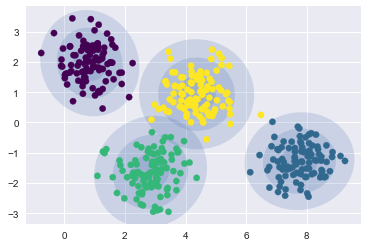

In [316]:
plot_gmm(gmm, X)

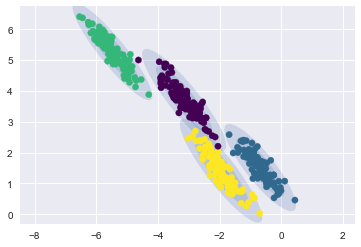

In [347]:
# Generate  data
from sklearn.datasets.samples_generator import make_blobs
from sklearn.mixture import GaussianMixture
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] 

# Instanciation
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)

# data pertubation
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

### GMM: covariance shape

In [342]:
np.degrees(np.arctan2(U[1, 0], U[0, 0]))
# the signed angle in radians between the ray ending 
# at the origin and passing through the point (1,0), 
# and the ray ending at the origin and
# passing through the point (U[0,0], U[1,0])


array([-112.50283434,   -9.98744795])

-  ***How to convert covariance to axes?*** <br>
&nbsp; &nbsp;&nbsp;For single value decomposion [Click Here](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linalg.svd.html)  <br>
&nbsp; &nbsp;&nbsp;For SVD in Wiki[Click Here](https://en.wikipedia.org/wiki/Singular-value_decomposition)

-  ***Conjugate Transpose***

\begin{align*}
    A= 
         \begin{bmatrix} 
                 1& -2-i& \\
                 1+i &i & 
         \end{bmatrix} ,~~~~~~
    A^H =     
         \begin{bmatrix} 
                 1& 1-i& \\
                 -2 + i &-i & 
         \end{bmatrix}
\end{align*}

- \textbf{Normal}: $A \cdot A^H = A^H \cdot A$ <br>
- \textbf{Unitary}: $A^H = A^{-1}$
- \textbf{Conjugate or Hermitian}: $A = A^{H}$
    -  Conjugate: $A^c = det(A) A^{-1}$

-  *** SVD (Sigularity-Value Decomposition)***   
\begin{align*}
M_{m\times n} &= U_{m\times m}\Sigma_{m\times n} V^*_{n \times n} \\
&\text{where}~~ U=\text{unitary matrix},~~ \Sigma=\text{rectangular diagonal matrix},~~ V=\text{unitary matrix} \\
& \text{diagonal elements}~~ \sigma_i~~ in~~ \Sigma~~ called~~ \mathbf{\text{Singular Values of}}~~ M,\\
& U, V~~ \mathbf{\text{Singular Vector of M}}
\end{align*}

- SVD caluclation
  -  The non-zero singular values of M (found on the diagonal entries of $\Sigma$) are the square roots of the non-zero eigenvalues of both $M^H M$ and $MM^H$.
  -  The left-singular vectors of $M$ are a set of orthonormal eigenvectors of $MM^H$
  -  The right-singular vectors of $M$ are a set of orthonormal eigenvectors of $M^H M$
 

***What is plot_gmm?***

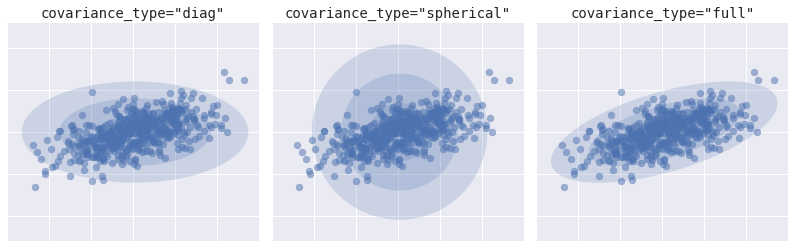

In [390]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
from sklearn.mixture import GMM

from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

fig, ax = plt.subplots(1, 3, figsize=(14, 4), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05)

rng = np.random.RandomState(5)
X = np.dot(rng.randn(500, 2), rng.randn(2, 2))

for i, cov_type in enumerate(['diag', 'spherical', 'full']):
    model = GMM(1, covariance_type=cov_type).fit(X)
    ax[i].axis('equal')
    ax[i].scatter(X[:, 0], X[:, 1], alpha=0.5)
    ax[i].set_xlim(-3, 3)
    ax[i].set_title('covariance_type="{0}"'.format(cov_type),
                    size=14, family='monospace')
    draw_ellipse(model.means_[0], model.covars_[0], ax[i], alpha=0.2)
    ax[i].xaxis.set_major_formatter(plt.NullFormatter())
    ax[i].yaxis.set_major_formatter(plt.NullFormatter())    

### GMM as denstity estimation

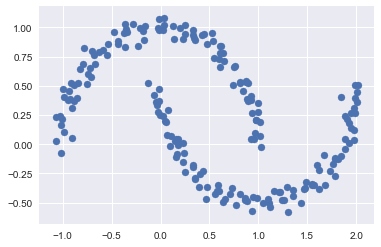

In [369]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

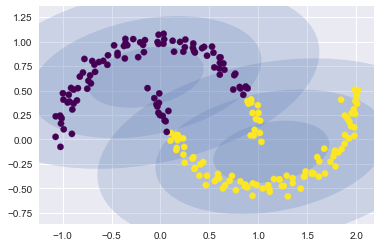

In [391]:
gmm2 = GMM(n_components=2, covariance_type='full', random_state=0)
plot_gmm(gmm2, Xmoon)

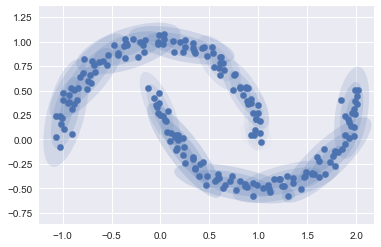

In [392]:
gmm16 = GMM(n_components=16, covariance_type='full', random_state=0)
plot_gmm(gmm16, Xmoon, label=False)

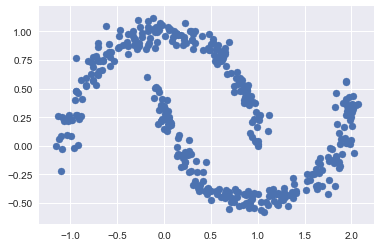

In [393]:
# plotting data generated from 16 components as above:

Xnew = gmm16.sample(400, random_state=42)
plt.scatter(Xnew[:, 0], Xnew[:, 1]);

### Model selection criteria

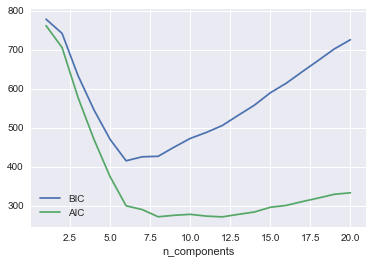

In [394]:
n_components = np.arange(1, 21)
models = [GMM(n, covariance_type='full', random_state=0).fit(Xmoon)
          for n in n_components]

plt.plot(n_components, [m.bic(Xmoon) for m in models], label='BIC')
plt.plot(n_components, [m.aic(Xmoon) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');
#bic는 aic보다 항상 적은 시차 selection을 함(과학적으로도 증명됨 ㄹㅇ)

-  *** 8-12 components are enough***

### GMM as data generator
-  load data: load_digits
-  rank reduction using PCA
- regenerate data ($x_{new}$)using estimated PCA
- $x_{new}$ is estimated using GMM
- Using AIC or BIC to choose components and generate data ($x_{new\_gmm}$)
- convert $x_{new\_gmm}$ into new digits 
- to see whether new digits are plausible with eyebalss